## Name : Prachi Ranjan
## Contact No: +91 8106694870
## Mail ID : pra.rjn@gmail.com
## Oasis Infobyte Data Science Internship
## Github Link: https://github.com/PrachiRanjan3/OIBSIP
## Task 1 : Iris Flower Classification

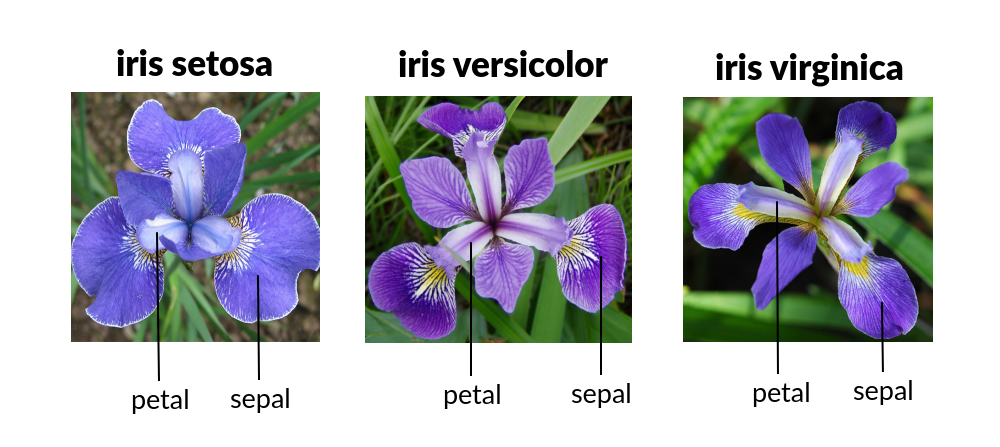
### Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

## Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')

## Exploring the dataset

In [6]:
Iris_data= pd.read_csv("Iris dataset.csv").set_index("Id")
Iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
Iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
Iris_data['Species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [10]:
Iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

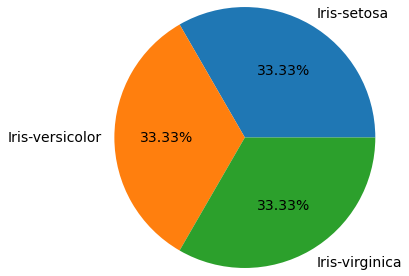

In [11]:
Values= Iris_data['Species'].value_counts() 
labels = Iris_data['Species'].value_counts().index.tolist()
plt.pie(Values, labels=labels,  autopct= '%1.2f%%',radius =1.5,textprops={'fontsize': 14});

## Density Distribution

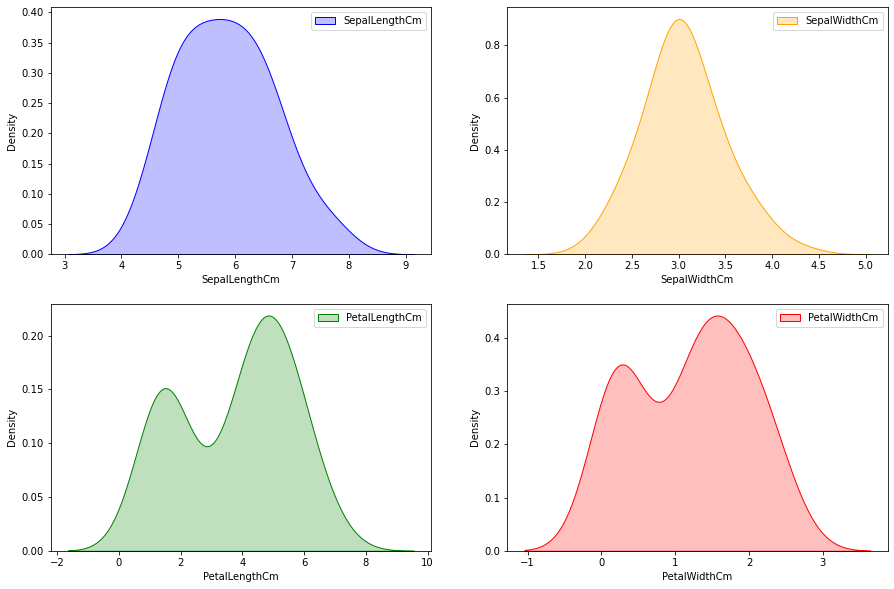

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)

sns.kdeplot(Iris_data['SepalLengthCm'], shade=True, bw=0.5, color="blue")
plt.legend(['SepalLengthCm'])

plt.subplot(2,2,2)
sns.kdeplot(Iris_data['SepalWidthCm'], shade=True, bw=0.5, color="orange")
plt.legend(['SepalWidthCm'])

plt.subplot(2,2,3)
sns.kdeplot(Iris_data['PetalLengthCm'], shade=True, bw=0.5, color="green")
plt.legend(['PetalLengthCm'])

plt.subplot(2,2,4)
sns.kdeplot(Iris_data['PetalWidthCm'], shade=True, bw=0.5, color="red")
plt.legend(['PetalWidthCm'])


## Histogram Distribution

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

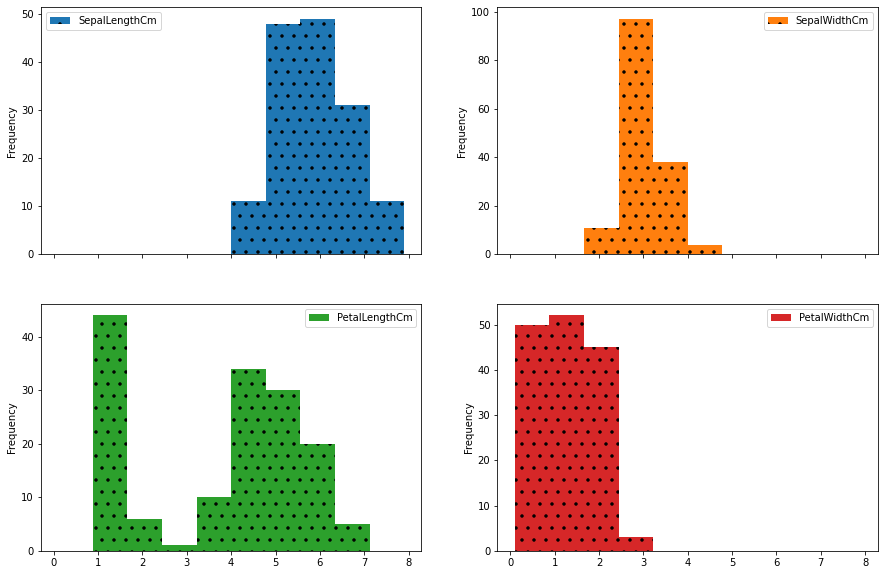

In [13]:
Iris_data.plot.hist(subplots=True,layout=(2,2),figsize=(15,10), hatch = '.')

## Checking Outliers

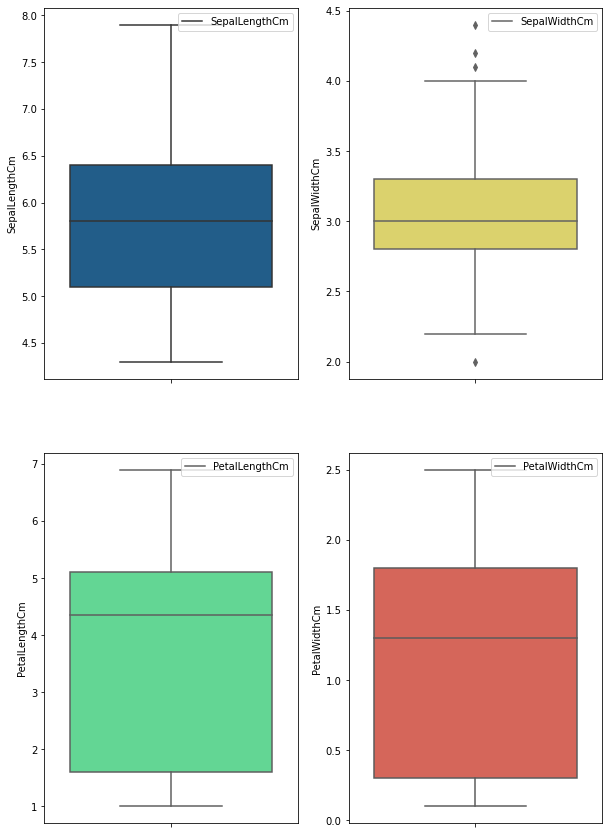

In [14]:
plt.figure(figsize=(10,15))
plt.subplot(2,2,1)
sns.boxplot(y=Iris_data['SepalLengthCm'],color="#115f9a")
plt.legend(['SepalLengthCm'], loc='upper right')

plt.subplot(2,2,2)
sns.boxplot(y=Iris_data['SepalWidthCm'], color="#ede15b")
plt.legend(['SepalWidthCm'],loc='upper right')

plt.subplot(2,2,3)
sns.boxplot(y=Iris_data['PetalLengthCm'], color="#50e991")
plt.legend(['PetalLengthCm'],loc='upper right')

plt.subplot(2,2,4)
sns.boxplot(y=Iris_data['PetalWidthCm'], color="#ea5545")
plt.legend(['PetalWidthCm'],loc='upper right')


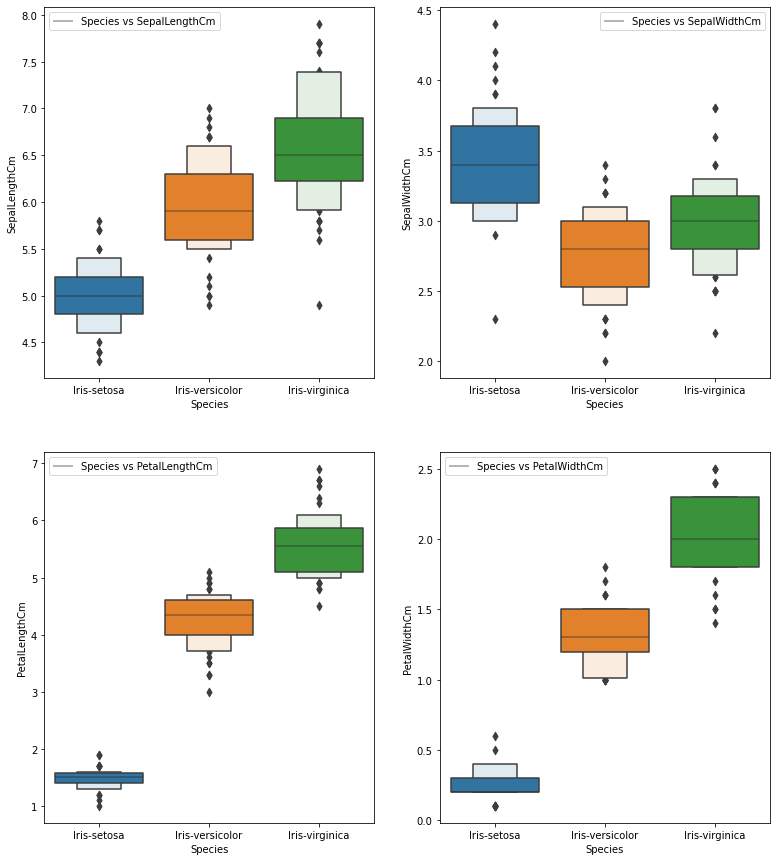

In [15]:
plt.figure(figsize=(13,15))

plt.subplot(2,2,1)
sns.boxenplot(x=Iris_data['Species'], y=Iris_data['SepalLengthCm'],data= Iris_data)
plt.legend(['Species vs SepalLengthCm'] )

plt.subplot(2,2,2)
sns.boxenplot(x=Iris_data['Species'], y=Iris_data['SepalWidthCm'], data =Iris_data)
plt.legend(['Species vs SepalWidthCm'])

plt.subplot(2,2,3)
sns.boxenplot(x=Iris_data['Species'], y=Iris_data['PetalLengthCm'],data =Iris_data)
plt.legend(['Species vs PetalLengthCm'])

plt.subplot(2,2,4)
sns.boxenplot(x=Iris_data['Species'], y=Iris_data['PetalWidthCm'], data=Iris_data)
plt.legend(['Species vs PetalWidthCm'])


##  Correlation

In [16]:
correl = Iris_data.iloc[:,:4].corr()
correl

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

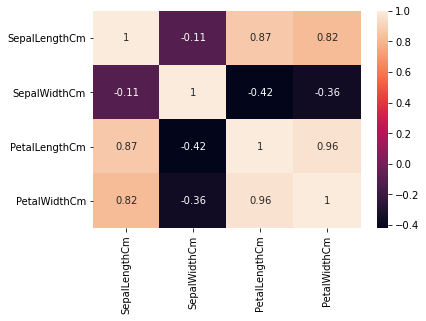

In [17]:
sns.heatmap(correl, annot =True)

**From the above chart we can infer that PetalLengthCm has more influence on determining the species of flowers.**

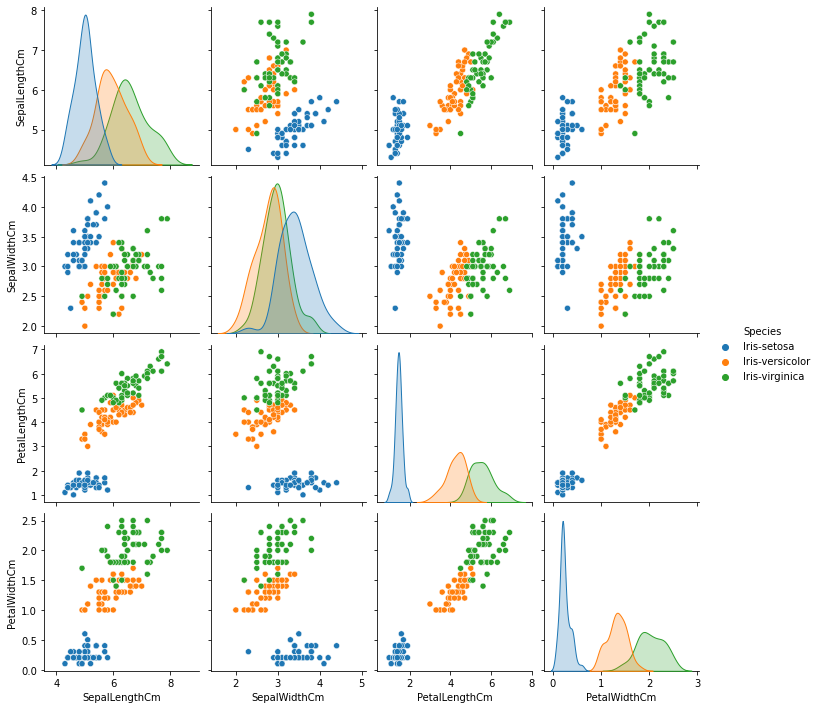

In [18]:
sns.pairplot(Iris_data,hue='Species')

## Preparing the data for training and testing of model

In [19]:
x= Iris_data.iloc[:,:-1]
y = Iris_data.iloc[:, -1]
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size= 0.25,random_state=0)

## Training the data using Logistic Regression

In [20]:
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)

LogisticRegression()

## Evaluating the performance using Logistic Regression

In [21]:
y_pred_1 = model_1.predict(x_test)
y_pred_1

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [22]:
confusion_matrix(y_test, y_pred_1 )

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [23]:
Accuracy= accuracy_score(y_test, y_pred_1)
print("Accuracy:", Accuracy)

Accuracy: 0.9736842105263158


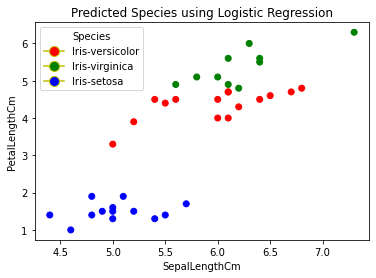

In [24]:
color_class = {
    'Iris-versicolor' : 'red',
    'Iris-virginica' : 'green',
    'Iris-setosa' : 'blue',
}

colors = [color_class[label] for label in y_pred_1]

plt.scatter(x_test.SepalLengthCm, x_test.PetalLengthCm, c=colors)
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Predicted Species using Logistic Regression')
legend_entries = [
    plt.Line2D([0], [0], marker='o', color='y', markerfacecolor=color, markersize=10, label=label)
    for label, color in color_class.items()
]
plt.legend(handles=legend_entries, title='Species')
plt.show()

## Training the data using Linear SVC

In [25]:
model_2 = LinearSVC()
model_2.fit(x_train, y_train)

LinearSVC()

## Evaluating the performance using Linear SVC

In [26]:
y_pred_2 = model_2.predict(x_test)
y_pred_2

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [27]:
confusion_matrix(y_test,y_pred_2)

array([[13,  0,  0],
       [ 0, 13,  3],
       [ 0,  0,  9]], dtype=int64)

In [28]:
print(accuracy_score(y_test,y_pred_2))

0.9210526315789473


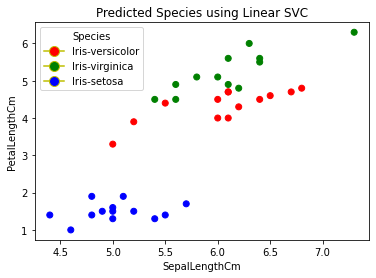

In [29]:
color_class = {
    'Iris-versicolor' : 'red',
    'Iris-virginica' : 'green',
    'Iris-setosa' : 'blue',
}

colors = [color_class[label] for label in y_pred_2]

plt.scatter(x_test.SepalLengthCm, x_test.PetalLengthCm, c=colors)
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Predicted Species using Linear SVC')
legend_entries = [
    plt.Line2D([0], [0], marker='o', color='y', markerfacecolor=color, markersize=10, label=label)
    for label, color in color_class.items()
]
plt.legend(handles=legend_entries, title='Species')
#plt.savefig('Predicted Species using Linear SVC.png',bbox_inches='tight',facecolor='white',pad_inches=0.1, dpi=100 )
plt.show()

## Training the data using Random Forest 

In [30]:
model_3 = RandomForestClassifier().fit(x_train,y_train)
model_3

RandomForestClassifier()

## Evaluating the performance using Random Forest

In [31]:
y_pred_3 = model_3.predict(x_test)
y_pred_3

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [32]:
confusion_matrix(y_test, y_pred_3)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred_3)

0.9736842105263158

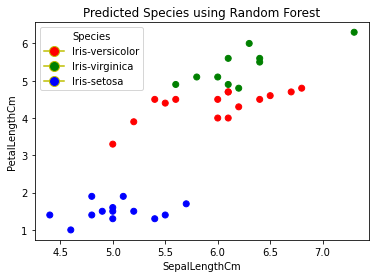

In [34]:
color_class = {
    'Iris-versicolor' : 'red',
    'Iris-virginica' : 'green',
    'Iris-setosa' : 'blue',
}

colors = [color_class[label] for label in y_pred_3]

plt.scatter(x_test.SepalLengthCm, x_test.PetalLengthCm, c=colors)
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Predicted Species using Random Forest')
legend_entries = [
    plt.Line2D([0], [0], marker='o', color='y', markerfacecolor=color, markersize=10, label=label)
    for label, color in color_class.items()
]
plt.legend(handles=legend_entries, title='Species')
plt.show()

## Training the data using Decision Tree

In [35]:
model_4= DecisionTreeClassifier().fit(x_train,y_train)
model_4

DecisionTreeClassifier()

## Evaluating the performance using Decision Tree

In [36]:
y_pred_4 = model_4.predict(x_test)

In [37]:
confusion_matrix(y_test, y_pred_4)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [38]:
accuracy_score(y_test,y_pred_4)

0.9736842105263158

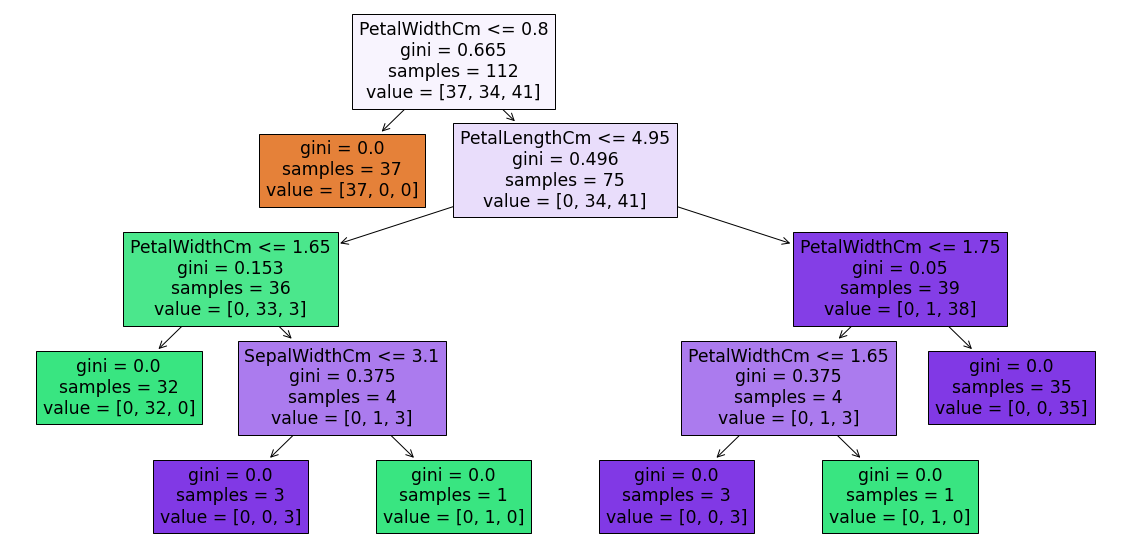

In [39]:
from sklearn import tree 
plt.figure(figsize=(20,10))
tree.plot_tree(model_4,feature_names=x_train.columns, filled=True);

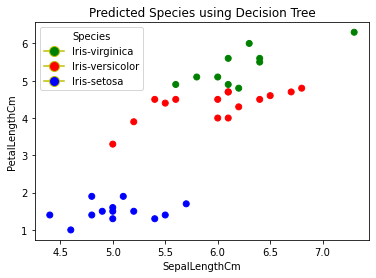

In [40]:
color_class = {
    'Iris-virginica' : 'green',
    'Iris-versicolor' : 'red',
    'Iris-setosa' : 'blue',
}

colors = [color_class[label] for label in y_pred_4]

plt.scatter(x_test.SepalLengthCm, x_test.PetalLengthCm, c=colors)
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Predicted Species using Decision Tree')
legend_entries = [
    plt.Line2D([0], [0], marker='o', color='y', markerfacecolor=color, markersize=10, label=label)
    for label, color in color_class.items()
]
plt.legend(handles=legend_entries, title='Species')
plt.show()

## From the above tree plot using Decision tree model we can infer the following:-
### If Petal Length < 3 cm then the Species of the flower is Setosa.
### If Petal Length >= 3 cm then the Specis of the flower may be Virginica or Versicolor.
### If Petal Length >= 3 and Petal Length < 5 then most of the Species are Versicolor

In [41]:
Iris_setosa = Iris_data[Iris_data.PetalLengthCm <3]
Iris_setosa.to_csv('Iris_setosa.csv', index = False)
pd.read_csv('Iris_setosa.csv')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [42]:
Iris_versicolor = Iris_data[(Iris_data.PetalLengthCm >= 3) & (Iris_data.PetalLengthCm < 5)]
Iris_versicolor.to_csv('Iris_versicolor.csv', index= False)
pd.read_csv('Iris_versicolor.csv')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor
5,5.7,2.8,4.5,1.3,Iris-versicolor
6,6.3,3.3,4.7,1.6,Iris-versicolor
7,4.9,2.4,3.3,1.0,Iris-versicolor
8,6.6,2.9,4.6,1.3,Iris-versicolor
9,5.2,2.7,3.9,1.4,Iris-versicolor


In [43]:
Iris_virginica = Iris_data[Iris_data.PetalLengthCm >5]
Iris_virginica.to_csv('Iris_virginica.csv', index= False)
pd.read_csv('Iris_virginica.csv')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.0,2.7,5.1,1.6,Iris-versicolor
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.8,2.7,5.1,1.9,Iris-virginica
3,7.1,3.0,5.9,2.1,Iris-virginica
4,6.3,2.9,5.6,1.8,Iris-virginica
5,6.5,3.0,5.8,2.2,Iris-virginica
6,7.6,3.0,6.6,2.1,Iris-virginica
7,7.3,2.9,6.3,1.8,Iris-virginica
8,6.7,2.5,5.8,1.8,Iris-virginica
9,7.2,3.6,6.1,2.5,Iris-virginica


## Final Conclusion:-
### We have classified Irish Flower datset using classification Model like Logistic Regression, Linear SVC Model, Random Forest Classifier, Decision Tree.
### In 3 cases using Logistic Regression, Random Forest Classifier and Decsion tree we achieved accuracy score of 0.97 and in Linear SVC Model we achieved accuracy score of 0.92

### We can conclude that:-
###  If Petal Length < 3 cm then the Species of the flower is Setosa.
### If Petal Length >= 3 and Petal Length < 5 then most of the Species are Versicolor.
### If Petal Length > 5 cm then most of the Species are Virginica.